# Budget Analysis

---

## Environment Setup

In [2]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
# Set environment variables from the .env file
load_dotenv()

True

In [5]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [6]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key= PLAID_PUBLIC_KEY, environment='sandbox')

In [7]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [8]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID,['transactions', 'income', 'assets'])
# Print the public token
#create_public_token

### 3. Exchange the public token for an access token

In [9]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke

In [10]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [11]:
# Retrieve accounts
client.Accounts.get(access_token)
# Print accounts


{'accounts': [{'account_id': 'jn61z5DLKgfdZQnNrg5WHjQVJ8A6zzt1BrGdn',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '7DNdkbGRWVC51KnRzxZJsXjJ3kBMeeigm71Pv',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'eWD7nX9M8JFnLNDA69yEulz4V65PWWcLzoVGW',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [13]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date ='{:%Y-%m-%d}' .format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
ninety_day_transaction = client.Transactions.get(access_token,start_date,end_date)
# Print the transactions
print(json.dumps(ninety_day_transaction['transactions'][:2], indent=4, sort_keys=True))

[
    {
        "account_id": "QDAvyMjpaWCgzB6JbjdVhNZ564x1JJCpJqaV9",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-05-30",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 2. Print the categories for each transaction

In [14]:
# Create a for-loop to print the categories for each transaction
count = -1
df1=[]
for x in ninety_day_transaction['transactions']:
    count += 1
#   print(ninety_day_transaction['transactions'][count]['category'][0]) ##this prints just the first element in the list
    print(ninety_day_transaction['transactions'][count]['category'])
    df1.append(ninety_day_transaction['transactions'][count]['category'][0])
    

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [15]:
#df1 done in last step isolates first item in list, will concat with other dataframe

new_cat_df =pd.DataFrame(df1)
new_cat_df

,0
0,Travel
1,Travel
2,Food and Drink
3,Payment
4,Food and Drink
5,Shops
6,Payment
7,Travel
8,Transfer
9,Transfer


In [16]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
df = pd.DataFrame(ninety_day_transaction['transactions'])
df.columns
df = df.drop(columns=['account_id', 'account_owner', 'authorized_date','category_id', 'iso_currency_code', 'location',
       'payment_channel', 'payment_meta', 'pending', 'pending_transaction_id',
       'transaction_code', 'transaction_id', 'transaction_type',
       'unofficial_currency_code'])
df = df[['date','name','amount', 'category']]

df = pd.concat([df, new_cat_df], axis = 'columns', join= 'inner')
df= df.rename(columns={0 : 'Category', 'date': 'Date', 'name' : 'Name', 'amount' : 'Amount', 'category': 'drop me'})
df = df.drop(columns=['drop me'])
df

,Date,Name,Amount,Category
0,2020-05-30,United Airlines,500.00,Travel
1,2020-05-28,Uber,6.33,Travel
2,2020-05-25,Tectra Inc,500.00,Food and Drink
3,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-05-24,KFC,500.00,Food and Drink
5,2020-05-24,Madison Bicycle Shop,500.00,Shops
6,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
7,2020-05-15,Uber,5.40,Travel
8,2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
9,2020-05-14,CD DEPOSIT .INITIAL.,1000.00,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [17]:
# Display data types
df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

In [18]:
# Make any required data type transformation
df['Date']= pd.to_datetime(df['Date'])

In [19]:
# Set the date column as index
df.set_index(df['Date'],inplace=True)
df = df.drop(columns=['Date'])
# Display sample data
df.head()

,Name,Amount,Category
Date,,,
2020-05-30,United Airlines,500.00,Travel
2020-05-28,Uber,6.33,Travel
2020-05-25,Tectra Inc,500.00,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-05-24,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [20]:
client.Income.get(access_token)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'ggM7FD5NdK6yG9g'}

In [32]:
# Fetch the income data
year_transaction=client.Income.get(access_token)


# Print the income data
print(json.dumps(year_transaction['income'], indent=4, sort_keys=True))



{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'Ll2XlM4MqL2hGib'}

In [43]:
# Determine the previous year's gross income and print the results
gross_income=year_transaction['income']['last_year_income_before_tax']
print(f'Previous year gross income {gross_income}')

Previous year gross income 7285


In [52]:
# Determine the current monthly income and print the results
monthly_income=year_transaction['income']['income_streams'][0]['monthly_income']
print(f'Monthly income ${monthly_income}')

Monthly income $500


In [54]:
# Determine the projected yearly income and print the results
projected_yearly_income=year_transaction['income']['projected_yearly_income']
print(f'Projected yearly income ${projected_yearly_income}')


Projected yearly income $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [105]:
# Compute the total expenses per category
expences= df['Category'].value_counts()

# Display the expenses per catefory
expences

Food and Drink    15
Travel            12
Transfer           9
Payment            6
Shops              3
Recreation         3
Name: Category, dtype: int64

### Calculate the expenses per month

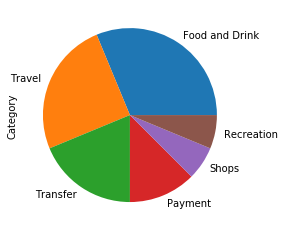

In [106]:
# Create a spending categories pie chart.
expences.plot(kind='pie')

In [113]:
# Create a DataFrame with the total expenses
total_exp = pd.DataFrame(expences)
# Display sample data
total_exp.head()


,Category
Food and Drink,15
Travel,12
Transfer,9
Payment,6
Shops,3


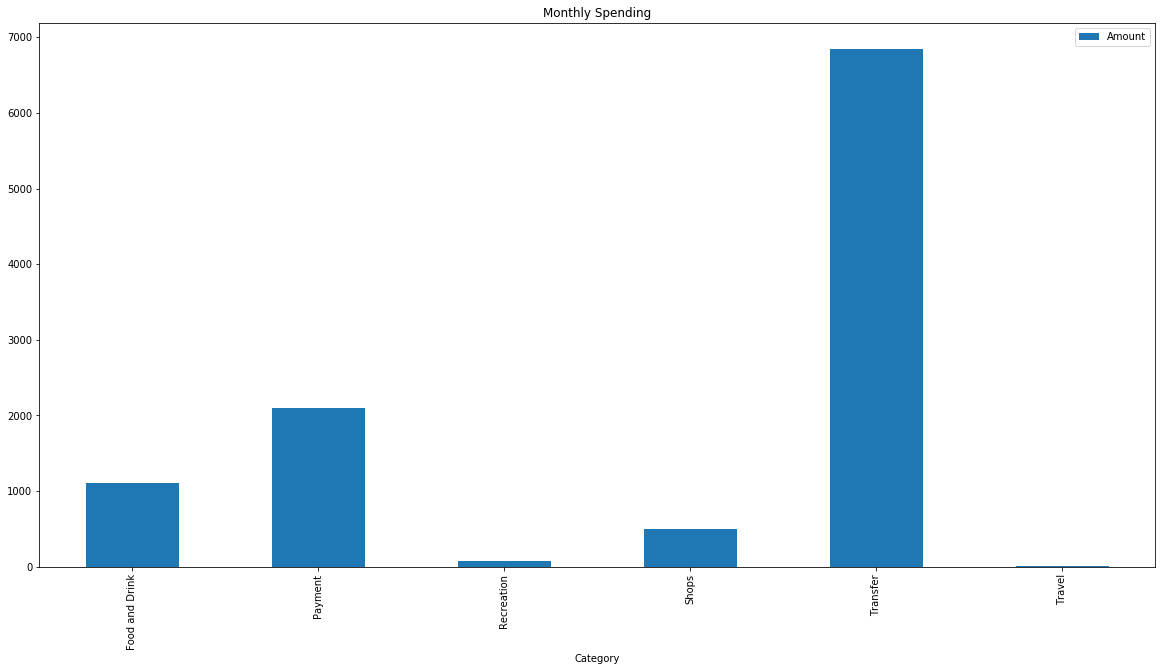

In [189]:
# Create a spending per month bar chart
df.sort_index(inplace=True)
#df=df.drop(columns=['Name'])

march_df = df.loc['2020-03-11': '2020-03-31',['Amount']].sum()
april_df =df.loc['2020-04-10': '2020-04-30',['Amount']].sum() 
may_df = df.loc['2020-05-10': '2020-05-30',['Amount']].sum()

#montly spending for march, all month's were the same
march_exp = df.loc['2020-03-11': '2020-03-31']
march_exp = march_exp.groupby('Category').sum()
march_exp.plot(kind='bar', figsize=(20,10), title ='Monthly Spending')

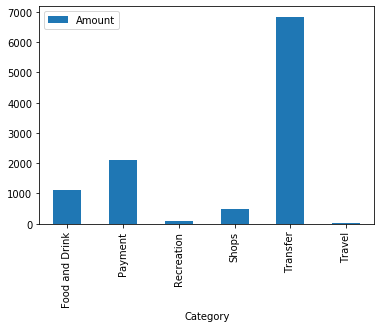

In [185]:
#april bar chart, same as other months
april_exp =df.loc['2020-04-10': '2020-04-30']
april_exp = april_exp.groupby('Category').sum()
april_exp.plot(kind='bar')

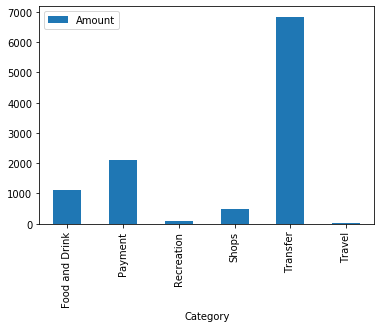

In [187]:
#may bar chart same as other months
may_exp = df.loc['2020-05-10': '2020-05-30']
may_exp = may_exp.groupby('Category').sum()
may_exp.plot(kind='bar')